# Chapter 2: 感知机

感知机是一个非常经典的分类模型，最早由 Frank Rosenblatt 在1958年提出，也是神经网络的雏形。感知机的核心思想是通过线性组合输入特征和权重，然后通过激活函数进行非线性变换，最终输出分类结果。

----

## Section 2.1: 数学原理

如前述，感知机模型用于处理二分类问题。不妨将待分类数据抽象成二维平面上的一个点，那么分类的目标就可以表示为，寻找一个最好的超平面，将数据点分开至平面的两侧，并尽可能让同侧的数据点的类别相同。

（此处为一图）

如上图所示，数据集中两类点能够被完全正确地划分到超平面两侧，则称为线性可分数据集；反之，则数据集线性不可分。

### 超平面与决策函数

最好的超平面的表达式是模型学习的目标。首先可以确定的是，作为一个平面，它必定具有线性的表达，即：

$$
\pi: \quad X W + b = 0
$$

其中 $\pi$ 即该平面，X 为 m 个样本，每个样本 n 维特征组成的输入矩阵。对于二维特征的特例，划分平面为：

$$
ax_1 + bx_2 + c = 0
$$

即二维平面上直线。

在这个超平面上的点都有 $X_iW + b = 0$，而在平面的两侧的点，分别有 $X_iW + b > 0$ 和 $X_iW+b <0$。这就天然地形成了两个类别，也是感知机适合处理分类问题的原因。

这样我们可以轻松写出感知机模型的决策函数：

$$
f(X) = \text{sign} (XW+b)
$$

其中 $\text{sign}$ 是符号函数。决策函数通过计算待分类点位于超平面的哪一侧来判断其类别。

### 误分类点的判别与损失函数

很自然地，我们将大于 0 侧的点的标签设为 +1，小于 0 侧的点的标签设为 -1，那么对于误分类的点就有：

$$
y_i(X_iW+b)<0
$$

> [!proof]
> - 若真实标签为正例（$y_i = +1$），预测为反例（$X_iW+b<0$），两者乘积为负
> - 真实标签为负且预测为正，乘积同样为负
> - 其他预测正确的情况，乘积为正
>
> 这就说明这个对于误分类点的判别是合理的。

在 Chap.1 中提到，模型的训练问题同时也可以看作优化问题。因此，我们希望构建一个连续可微的损失函数，便于求取梯度等操作。同时，我们希望误分类点尽可能地少，或者更加精确地说，所有误分类点到超平面的距离之和最小。这样这样我们可以将损失函数定义成如下形式：

$$
L(W,b) = -\sum_{i \in M} \text{dist}(X_i, \pi)
$$

其中，$M$ 是误分类点的集合，$\text{dist}(X_i, \pi)$ 是点 $X_i$ 到超平面 $\pi$ 的距离。

点到平面的距离可以通过点到平面法向量的投影来计算。对于超平面 $\pi: XW + b = 0$，其法向量为 $W$。因此，点 $X_i$ 到平面的距离可以表示为：

$$
\text{dist}(X_i, \pi) = \frac{|X_iW + b|}{\|W\|}
$$

这样，损失函数可以进一步表示为：

$$
L(W,b) = \sum_{i \in M} \frac{|X_iW + b|}{\|W\|}
$$

利用误分类的性质（$y_i(X_iW+b)<0$），可以巧妙地去掉绝对值符号，得到：

$$
L(W,b) = -\sum_{i \in M} \frac{y_i(X_iW + b)}{\|W\|}
$$

然而，这个损失函数的优化仍然是非常复杂的，考虑对这个表达进行简化。由于感知机模型的目标仅仅是将数据点正确分类（假设数据线性可分），而单纯对上述损失函数进行优化，不仅得到正确分类，还会尽可能地增大分类间隔。感知机算法是一个“错误驱动”的算法。它只关心“是否存在误分类点”，而不关心这些点离超平面的具体距离是多少。因此，最大化分类间隔是一个多余的工作。实际上，我们可以忽略分母 $\|W\|$，得到一个更简单的损失函数：

$$
L(W,b) = -\sum_{i \in M} y_i(X_iW + b)
$$

这个损失函数与简化前的并不等价，但是都能够正确地反映误分类点的情况，达到使误分类点集为空的目的。将这个更加简单的代理损失函数作为感知机模型的损失函数是更好的选择。

### 感知机学习与随机梯度下降

同样地，我们对损失函数求取导数：

$$
\begin{aligned}
\frac{\partial L(W,b)}{\partial W} &= -\sum_{i \in M} (y_i X_i)^T \\
&= -\sum_{i \in M} y_i X_i^T\quad \text{（} y_i \text{为标量）} \\
\end{aligned}
$$

$$
\begin{aligned}
\frac{\partial L(W,b)}{\partial b} &= -\sum_{i \in M} y_i^T \\
&= -\sum_{i \in M} y_i \text{（} y_i \text{为标量）} \\
\end{aligned}
$$

与线性回归类似，感知机模型的损失函数也是一个凸函数，因此可以使用梯度下降法进行优化。然而，感知机模型的损失函数与误分类点相关，因此是一个不够光滑的函数，使用之前实现的“批量”的梯度下降法并不合适；另外，“批量”梯度下降法需要遍历所有样本，而不对误分类点加以区分，这样计算得出的“平均梯度”没有意义且不稳定，因此我们需要使用随机梯度下降法（Stochastic Gradient Descent）来优化感知机模型。

随机梯度下降法的核心思想是每次只使用一个样本来计算梯度，并更新模型参数。对于感知机模型，我们可以将每个样本的梯度计算如下：

$$
\nabla L(W,b) = (-y_i X_i^T, -y_i)
$$

随机梯度下降是误分类驱动的，通过设计一个智能的梯度计算函数，对正确分类的点返回 0 梯度，对误分类点正常计算，并在每一次发现误分类点即更新模型参数。这样不仅绕过了了不光滑的损失函数问题，还能确保在线性可分数据集上，模型参数能够在有限的迭代次数内收敛到一个正确的超平面。

由此写出梯度下降的更新公式：

$$
W \leftarrow W - \eta (-y_i X_i^T)
$$

$$
b \leftarrow b - \eta (-y_i)
$$

以上就是关于感知机模型的数学原理。

-----

## Section 2.2: 工程实现

本节介绍如何使用 Python 实现感知机模型。我们将使用 NumPy 库来处理矩阵运算，并实现一个感知机类。

### 随机梯度下降类 `StochasticGradientDescent`

有了线性回归的铺垫，我们同样可以考虑将随机梯度下降的实现抽象成一个类，接收学习率和迭代次数构造，并实现 `optimize` 方法来进行参数更新。以下是 `StochasticGradientDescent.optimize()` 的简单算法描述：

以下是 `StochasticGradientDescent.optimize()` 的简单算法描述：
1. 接收 $X$ 和 $y$，进行必要的参数验证
2. 外循环：迭代 `n_epochs` 次，随机打乱数据集，避免模型学习到数据的顺序
3. 内循环：遍历每个样本（已打乱顺序） $X_i, y_i$，计算梯度，更新模型参数
4. 返回更新后的模型参数

梯度计算函数需要作为一个静态方法实现在感知机类 `Perceptron` 中，只需复现数学原理中单个样本的梯度计算公式即可，当样本被正确分类时，返回零梯度。

> [!warning]
> 注意数据类型和维度匹配问题。

### 感知机类 `Perceptron`

有了随机梯度下降的实现，`Perceptron` 类的实现就变得非常简洁。首先，`Perceptron` 作为基估计器，需要继承 `BaseEstimator`；同时也是一个分类器，因此还需要继承 `ClassifierMixin`。在构造函数中，接收一个随机梯度下降的实例 `optimizer`，同时初始化权重 `W` 和偏置 `b` 为 `None`。

在 `fit` 方法中，首先进行参数验证，然后初始化权重和偏置为零向量和零标量。接着，调用 `optimizer.optimize()` 方法，传入数据集 $X$ 和标签 $y$，进行参数优化。最后，返回训练好的模型实例。

而 `predict` 更是简洁，只需按照决策函数的定义，计算 $XW + b$ 的符号并返回即可。

另外实现几个 `@property` 方法和 `@classmethod` 方法也是值得推荐的：

- `coef_` 和 `intercept_` 属性，分别返回权重和偏置，符合 scikit-learn 的习惯
- `with_default_optimizer` 类方法，方便用户快速创建一个带有默认随机梯度下降优化器的感知机实例

至此我们完成了感知机模型的实现。

----

## Section 2.3: 测试

导入必要的库和项目中的其他文件：

In [1]:
# basic imports
import numpy as np

# dataset preparation
from src.mlfromscratch.utils import data_loader
from src.mlfromscratch.utils import train_test_split

# preprocessing
from src.mlfromscratch.preprocessing import SimpleImputer, StandardScaler
from src.mlfromscratch.compose import Pipeline

# model
from src.mlfromscratch.models import Perceptron

# metrics
from src.mlfromscratch.metrics.classification import accuracy_score, precision_score, recall_score, f1_score

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

`data_loader` 模块提供了多种数据集的加载功能，包括生成线性回归数据、分类数据等。查看可用的数据集：

In [2]:
data_loader.get_available_datasets()

{'regression': <function src.mlfromscratch.utils.data_loader.load_regression_data(n_samples=100, n_features=1, noise=10, random_state=42)>,
 'classification': <function src.mlfromscratch.utils.data_loader.load_classification_data(n_samples=100, n_features=2, n_classes=2, n_redundant=0, random_state=42)>,
 'moons': <function src.mlfromscratch.utils.data_loader.load_moons_data(n_samples=100, noise=0.1, random_state=42)>,
 'circles': <function src.mlfromscratch.utils.data_loader.load_circles_data(n_samples=100, noise=0.1, factor=0.8, random_state=42)>,
 'blobs': <function src.mlfromscratch.utils.data_loader.load_blobs_data(n_samples=100, centers=3, n_features=2, random_state=42)>,
 'diabetes': <function src.mlfromscratch.utils.data_loader.load_diabetes_data()>,
 'iris': <function src.mlfromscratch.utils.data_loader.load_iris_data()>,
 'wine': <function src.mlfromscratch.utils.data_loader.load_wine_data()>,
 'breast_cancer': <function src.mlfromscratch.utils.data_loader.load_breast_cancer_

使用 blobs 数据集和真实的乳腺癌数据集来检测分类的功能是否正常：

In [3]:
X_1, y_1 = data_loader.load_blobs_data(n_samples=500, centers=2, n_features=2, random_state=42)
X_2, y_2 = data_loader.load_breast_cancer_data()
y_1 = np.where(y_1 == 0, -1, 1)
y_2 = np.where(y_2 == 0, -1, 1)

X_1.shape, y_1.shape, X_2.shape, y_2.shape

((500, 2), (500,), (569, 30), (569,))

分割数据集，展现数据集规模：

In [4]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, random_state=42)
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, random_state=42)
X_1_train.shape, X_1_test.shape, y_1_train.shape, y_1_test.shape

((400, 2), (100, 2), (400,), (100,))

定义预处理所用的转换器和管道：

In [5]:
imputer= SimpleImputer(strategy='mean')
scaler = StandardScaler()
model = Perceptron.with_default_optimizer()

pipeline_1 = Pipeline(
    steps=[
        ('impute', imputer),
        ('scale', scaler),
        ('model', model)
    ]
)
pipeline_2 = Pipeline(
    steps=[
        ('impute', imputer),
        ('scale', scaler),
        ('model', model)
    ]
)



In [6]:
pipeline_1.get_params()

{'steps': [('impute', SimpleImputer(strategy='mean')),
  ('scale', StandardScaler()),
  ('model',
   Perceptron(optimizer=<src.mlfromscratch.optim.gradient_descent.StochasticGradientDescent object at 0x7d094d70dcd0>))],
 'fitted_steps': []}

将训练和预测放在一起运行：

In [7]:
y_1_pred = pipeline_1.fit_predict(X=X_1_train, y=y_1_train, X_test=X_1_test)
y_2_pred = pipeline_2.fit_predict(X=X_2_train, y=y_2_train, X_test=X_2_test)

评估 Blobs 数据集上的各分类指标，展示性能：

In [8]:
# 评估数据集 1
print("Dataset 1:")
print(f"Accuracy: {accuracy_score(y_1_test, y_1_pred):.4f}")
print(f"Precision: {precision_score(y_1_test, y_1_pred):.4f}")
print(f"Recall: {recall_score(y_1_test, y_1_pred):.4f}")
print(f"F1 Score: {f1_score(y_1_test, y_1_pred):.4f}")

Dataset 1:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


定义决策边界的相关变量：

In [9]:
coef = pipeline_1.named_steps['model'].coef_
intercept = pipeline_1.named_steps['model'].intercept_
x1_min, x1_max = X_1[:, 0].min() - 1, X_1[:, 0].max() + 1
x_points = np.array([x1_min, x1_max])
y_points = -(coef[0] * x_points + intercept) / coef[1]

使用 matplotlib 和 seaborn 工具绘制数据集散点图和决策边界线：

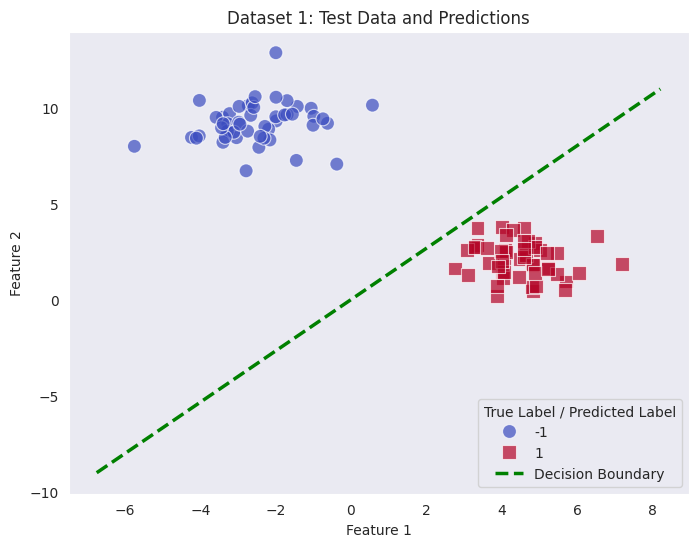

In [10]:
# 数据集 1 可视化（使用 seaborn 绘制散点图和决策边界）
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_1_test[:, 0], y=X_1_test[:, 1], hue=y_1_test, style=y_1_pred, palette='coolwarm',
                markers=['o', 's'], s=100, alpha=0.7)
sns.lineplot(x=x_points, y=y_points, color='green', linewidth=2.5,
             label='Decision Boundary', linestyle='--')
plt.title('Dataset 1: Test Data and Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='True Label / Predicted Label')
plt.grid()
plt.show()

评估模型在真实数据集上的性能：

In [11]:
# 评估数据集 2
print("Dataset 2:")
print(f"Accuracy: {accuracy_score(y_2_test, y_2_pred):.4f}")
print(f"Precision: {precision_score(y_2_test, y_2_pred):.4f}")
print(f"Recall: {recall_score(y_2_test, y_2_pred):.4f}")
print(f"F1 Score: {f1_score(y_2_test, y_2_pred):.4f}")

Dataset 2:
Accuracy: 0.9292
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


以上就是所有测试内容，可以看到模型正常运作。

---